In [1]:
include("../../../julia/FNC_init.jl")

  Activating project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-splines-splines)

For illustration, here is a spline interpolant using just a few nodes.

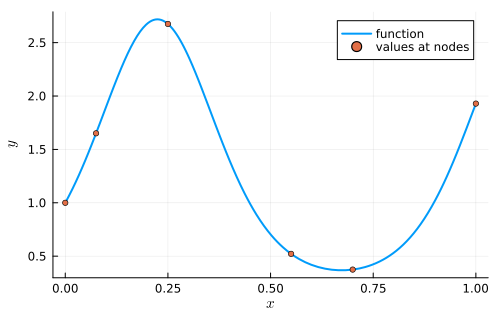

In [2]:
f = x -> exp(sin(7x))
plot(f, 0, 1, label="function", xlabel=L"x", ylabel=L"y")

t = [0, 0.075, 0.25, 0.55, 0.7, 1]  # nodes
y = f.(t)                           # values at nodes
scatter!(t, y, label="values at nodes")

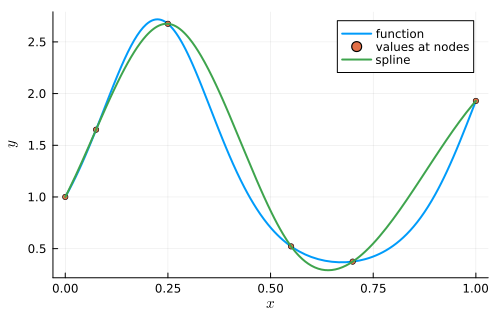

In [3]:
S = FNC.spinterp(t, y)
plot!(S, 0, 1, label="spline")

Now we look at the convergence rate as the number of nodes increases.

In [4]:
x = (0:10000) / 1e4              # sample the difference at many points
n = @. round(Int, 2^(3:0.5:7))  # numbers of nodes
err = zeros(length(n))
for (k, n) in enumerate(n)
    t = (0:n) / n
    S = FNC.spinterp(t, f.(t))
    dif = @. f(x) - S(x)
    err[k] = norm(dif, Inf)
end
@pt :header=["n", "max-norm error"] [n[1:2:end] err[1:2:end]]

n,max-norm error
8.0,0.0305634
16.0,0.00590761
32.0,0.000367049
64.0,2.15306e-5
128.0,1.24012e-6


Since we expect convergence that is $O(h^4)=O(n^{-4})$, we use a log-log graph of error and expect a straight line of slope $-4$.

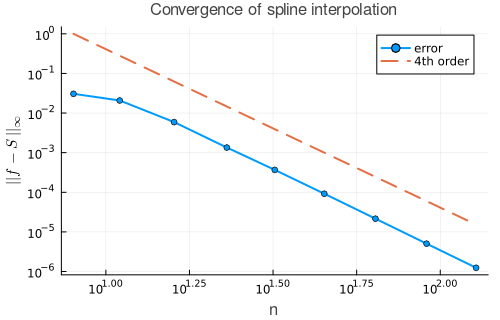

In [5]:
order4 = @. (n / n[1])^(-4)

plot(n, [err order4];
    m=[:o :none], l=[:solid :dash],
    label=["error" "4th order"],
    xaxis=(:log10, "n"),  yaxis=(:log10, L"|| f-S\,||_\infty"),
    title="Convergence of spline interpolation")